1. Find the top 10 countries that grew "Gross domestic product per capita" the most over the last
decade.

In [4]:
"""
Steps:
1. Identify the GDP per capita values for the first and last year 
of the last decade (My start year will be 2023 and last 2013).
2. Calculate the growth rate for each country by comparing the GDP per 
capita of the last year to the first year of the decade,
 to store in a new column.
3. Sort the countries based on their GDP per capita 
growth rates in descending order.
4. Select the top 10 countries with 
the highest growth rates as the answer.
"""
import pandas as pd

# Enable this to get rid of this error that was 
# persisting during development settingscopywarning
pd.options.mode.copy_on_write = True

# Load the dataset
we_url = "../NotebookTask1/we_data/WEOOct2020all.xlsx"

we_df = pd.read_excel(we_url)


def top_10_countries(we_df):
    # Filter only rows with Gross domestic product per capita 
    # in the subject descriptor
    gdp_per_capita_df = we_df[
        we_df['Subject Descriptor'] ==
        'Gross domestic product per capita'
        ]
    # Calculate the growth rate of GDP per capita for each country
    # formulae: (2023- 2013) / 2013 * 100
    gdp_per_capita_df['Growth Rate'] = ((gdp_per_capita_df[2023] -
                                         gdp_per_capita_df[2013])
                                        / gdp_per_capita_df[2013]) * 100
    # Sort the countries based on the growth rate in descending order
    gdp_per_capita_df = gdp_per_capita_df.sort_values(
        by='Growth Rate',
        ascending=False
    )
    # Select the top 10 countries with the highest growth rates
    return gdp_per_capita_df.head(10)


print(top_10_countries(we_df)[['Country', 'Growth Rate']])


                               Country    Growth Rate
8513                         Venezuela  200752.878465
5632                             Niger        96052.4
5994                  Papua New Guinea        86109.9
3383                           Iceland        85500.0
1717  Democratic Republic of the Congo        67062.5
1628                          Colombia        38250.0
2437                           Estonia   38204.504906
7119                       South Sudan        28520.8
1311                          Cambodia        27600.0
1492                              Chad        20850.7


Draw OECD countries' "Population" growth over the last decade.

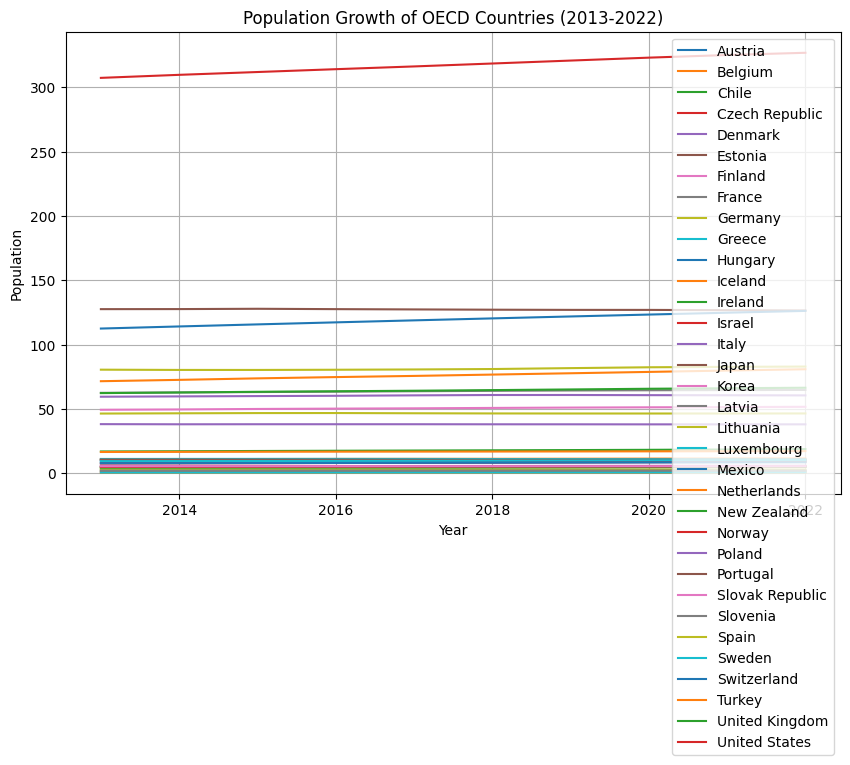

In [5]:
"""
1. Obtain a list of OECD countries
2. Filter from the dataframe for countries existing in 
OECD list and subject descriptor as Population
3.
"""
import matplotlib.pyplot as plt

oecd_countries = ['Austria', 'Belgium', 'Chile',
                  'Czech Republic', 'Denmark', 'Estonia', 'Finland',
                  'France', 'Germany', 'Greece', 'Hungary',
                  'Iceland', 'Ireland', 'Israel', 'Italy',
                  'Japan', 'Korea', 'Latvia', 'Lithuania',
                  'Luxembourg', 'Mexico', 'Netherlands',
                  'New Zealand', 'Norway', 'Poland', 'Portugal',
                  'Slovak Republic', 'Slovenia',
                  'Spain', 'Sweden', 'Switzerland',
                  'Turkey', 'United Kingdom', 'United States'
                  ]
oecd_population_data = we_df[
    (we_df['Country'].isin(oecd_countries)) &
    (we_df['Subject Descriptor'] == 'Population')
    ]

years = [int(2013 + i) for i in range(10)]
oecd_population_growth = oecd_population_data[years]
plt.figure(figsize=(10, 6))
for country in oecd_countries:
    plt.plot(
        years, oecd_population_growth[
            oecd_population_data['Country'] == country
            ].values[0],
        label=country
    )
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth of OECD Countries (2013-2022)')
plt.legend()
plt.grid(True)
plt.show()



Save the GDP growth figures in separate charts and save them as PNG files.

In [7]:
countries = we_df.drop_duplicates(subset="Country")
# Assuming you already have df_last_decade from Task 1
# Plot and save GDP growth figures for each country as PNG files
for index, row in countries.iterrows():
    country = row['Country']
    plt.figure(figsize=(8, 6))
    plt.plot(years, years)
    plt.xlabel('Year')
    plt.ylabel('GDP per capita')
    plt.title(f'GDP per capita Growth in {country}')
    plt.grid(True)
    plt.savefig(f'../NotebookTask1/graph_images/{country}_GDP_growth.png')
    plt.close()



4 . Create 5 clusters out of the countries using GDP and "Volume of exports of goods".
    a. Draw the charts (x-axis - GDP, y - volume).
    b. Add labels for the top 5 countries according to the GDP on the dots representing countries
    in each cluster.

/home/bassam/Desktop/hobbies/aailabs/dockerized-venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


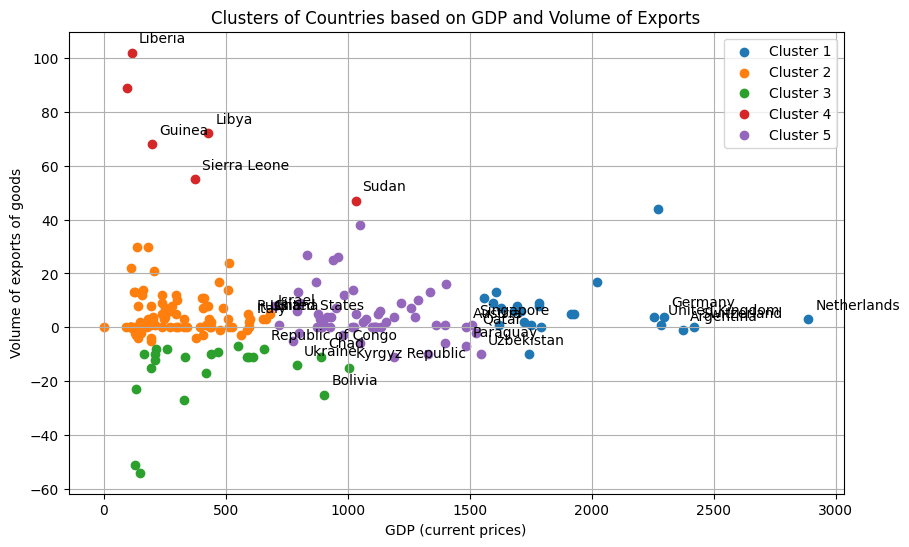

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter with only gross domestic product values
gdp_data = we_df[we_df['Subject Descriptor'] == 'Gross domestic product']

# Filter with volume of exports
volume_exports_data = we_df[we_df['Subject Descriptor'] == 'Volume of exports of goods']

# Filter all countries and drop duplicates
new_we_df = we_df.drop_duplicates(subset="Country")


def sum_fields_2019(country, subject_descriptor):
    gdp_column = we_df[
        (we_df['Country'] == country) &
        (we_df['Subject Descriptor'] == subject_descriptor)
        ]
    gdp_numeric = pd.to_numeric(
        gdp_column[2019],
        errors='coerce'
    ).fillna(0).astype(int)
    total = gdp_numeric.sum()
    return total


# Create new columns 'gdp' and 'volume' in the DataFrame and calculate the sums
# To have a table that looks like this
"""
   country      gdp     volume
1  America       45       3000
"""
new_we_df['gdp'] = new_we_df['Country'].apply(
    lambda country: sum_fields_2019(
        country, "Gross domestic product"
    )
)
new_we_df['volume'] = new_we_df['Country'].apply(
    lambda country: sum_fields_2019(
        country, "Volume of exports of goods"
    ))

# Create a feature matrix
feature_matrix = np.column_stack(
    (new_we_df["gdp"],
     new_we_df["volume"]
     )
)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_matrix)

# Apply K-means clustering to create 5 clusters
kmeans = KMeans(
    n_clusters=5,
    random_state=42
)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
new_we_df['Cluster'] = clusters

# Plot the clusters and label the top 5 countries
plt.figure(figsize=(10, 6))
for cluster_num in range(5):
    cluster_data = new_we_df[
        new_we_df['Cluster'] == cluster_num
        ]
    plt.scatter(
        cluster_data["gdp"],
        cluster_data['volume'],
        label=f'Cluster {cluster_num + 1}'
    )
    # Add labels for the top 5 countries with the highest GDP values in each cluster
    for i, country in cluster_data.sort_values(
            by='gdp', ascending=False).head(5).iterrows():
        plt.annotate(
            country['Country'],
            xy=(country["gdp"], country['volume']),
            xytext=(5, 5),
            textcoords='offset points',
            ha='left', va='bottom')

plt.xlabel('GDP (current prices)')
plt.ylabel('Volume of exports of goods')
plt.title('Clusters of Countries based on GDP and Volume of Exports')
plt.legend()
plt.grid(True)
plt.show()




Find all the data fields from the year 2015 that are present in most of the countries.

In [9]:
import pandas as pd

# Step 1: Filter the data for the year 2015

we_df = pd.read_excel(we_url)

df_cleaned = we_df.dropna(subset=[2015])
# By here the data is already cleaned to
# contain rows with data on column 2015
subject_counts_by_country = df_cleaned.groupby(
    'Subject Descriptor')['Country'].count()

threshold = 300
# filter only subjects that have passed the 300 threshold
popular_subjects = subject_counts_by_country[
    subject_counts_by_country >= threshold
    ]

print("Below are subjects that have appeared most in various countries:")
print(popular_subjects)





Below are subjects that have appeared most in various countries:
Subject Descriptor
Current account balance                              368
General government gross debt                        325
General government net lending/borrowing             380
General government primary net lending/borrowing     368
General government revenue                           372
General government total expenditure                 382
Gross domestic product                              1160
Gross domestic product per capita                    962
Inflation                                            768
Name: Country, dtype: int64


Create a predictor (use scikit) to predict GDP per capita (exclude other GDP-related fields).

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

we_df = pd.read_excel(we_url)
we_df.columns = we_df.columns.astype(str)
we_df = we_df.loc[:, ~we_df.columns.str.startswith('Unnamed:')]
we_df = we_df[
    we_df["Subject Descriptor"] ==
    "Gross domestic product per capita"].fillna(0)
years = [str(2000 + i) for i in range(20)]
# Create a new DataFrame with the selected columns
features = we_df[years]
features = pd.get_dummies(features)

# Select the target variable 'Gross Domestic Product Per Capita'
target = we_df['2023']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features,target, 
    test_size=0.2, 
    random_state=42
)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mean_s_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The mean squared error is: {mean_s_error} ")

print(f"Fields used during training: {years}")

coefficients = pd.Series(regressor.coef_, index=features.columns)

top_5_features = coefficients.abs().nlargest(5)

print("Top 5 features that contribute the most to the predictions:")
print(top_5_features)



The mean squared error is: 57360.08068599728 
Fields used during training: ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
Top 5 features that contribute the most to the predictions:
2019    0.206999
2011    0.183796
2017    0.142607
2015    0.107515
2018    0.085429
dtype: float64


In [18]:
selected_features = features[
    top_5_features.index
]

X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    selected_features,
    target, test_size=0.2,
    random_state=42
)

regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)
print(X_test_selected)

y_pred_selected = regressor_selected.predict(
    X_test_selected
)

mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)


print(regressor_selected.coef_)


         2019     2011     2017     2015     2018
1765    3.000    3.000    3.000    3.000  802.305
7075    6.000    6.000    6.000    6.000  413.043
1540    7.000    4.000    6.000    5.000  407.423
4193  159.199  490.490  124.618  306.452  855.000
592     1.000    1.000    1.000    1.000  759.280
...       ...      ...      ...      ...      ...
6174  450.329  687.410   67.962   58.183    4.000
5677    3.000    2.000    3.000    2.000  223.570
7926  884.649  451.864   24.035  857.874   65.000
4688  812.882  569.217   98.478   21.402   13.000
4735    4.000    3.000    3.000    3.000  980.786

[195 rows x 5 columns]
[ 0.24461432  0.21352459  0.1752834   0.1399286  -0.14806393]


In [19]:
import joblib

# Save the predictor using the top 5 features to a file
joblib.dump(regressor_selected, 'gdp_per_capita_predictor.joblib')


['gdp_per_capita_predictor.joblib']